# Project: Web Data Pipeline

In [3]:
# import necessary libraries

import pandas as pd, json, requests, numpy as np, seaborn as sns, matplotlib as plt
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from time import sleep

In [4]:
authors_df = pd.read_csv('data/authors_scrap_api.csv')

### Authors API: looks like xml, actualy is softcore web crapping

In [64]:
# check how APIs are working

url = 'https://www.goodreads.com/author/list/3961?format=xml&key=ejIq4gALj4hDr5pQ4hegQ'
response = requests.get(url)
sopa = BeautifulSoup(response.content,'lxml')
sopa

<?xml version="1.0" encoding="UTF-8"?><html><body><goodreadsresponse>
<request>
<authentication>true</authentication>
<key></key>
<method></method>
</request>
<author>
<id>3961</id>
<name>Alan Moore</name>
<link/>
<books end="30" start="1" total="888">
<book>
<id type="integer">472331</id>
<isbn>0930289234</isbn>
<isbn13>9780930289232</isbn13>
<text_reviews_count type="integer">11353</text_reviews_count>
<uri>kca://book/amzn1.gr.book.v1.6SO292q4bYOxH37UYsJUWg</uri>
<title>Watchmen</title>
<title_without_series>Watchmen</title_without_series>
<image_url>https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1442239711l/472331._SX98_.jpg</image_url>
<small_image_url>https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1442239711l/472331._SY75_.jpg</small_image_url>
<large_image_url></large_image_url>
<link/>https://www.goodreads.com/book/show/472331.Watchmen
  <num_pages>416</num_pages>
<format>Paperback</format>
<edition_information></edition_information>

In [65]:
# per_page needs to be the same as the total books of this author. how to obtain it:

sopa.find('books')['total']

'888'

In [21]:
# let's retrieve data from this guy's 30 first-appearing books (also versions and editions)

# finding the searched tags

tags = ['title','isbn','publication_year','num_pages']

# bad news is 'name' (of author) shows 1 more than it should. good news is: same author per page, so just repeat.
# the following code will show only the first 30 titles

table = [[sopa.find('name').text]*(int(sopa.find('books')['end']))]

# iterating that for the desired tags

for tag in tags:
    rows = sopa.find_all(tag)
    rows = [row.text for row in rows]
    table.append(rows)

# ziping a list of list that makes sense of the found data and puting it into a dataframe
    
author_df = pd.DataFrame(list(map(list,zip(*table))))

# those column names also need some sense shoven into them

colnames = ['author','title','isbn','pub_year','num_pages']

author_df.columns = colnames
author_df.head()

,author,title,isbn,pub_year,num_pages
0,Alan Moore,Watchmen,0930289234,2005,416
1,Alan Moore,V for Vendetta,1401207928,2005,296
2,Alan Moore,Batman: The Killing Joke,0930289455,1995,50
3,Alan Moore,"Watchmen #1: At Midnight, All The Agents....",,1986,35
4,Alan Moore,"The League of Extraordinary Gentlemen, Vol. 1",1563898586,2002,192


In [8]:
# now, let's go big: find data from all books from each author in the digtionary below.
# that dict is composed by some of the most prominent names in the exact sciences.

author_dict = {"Ronald J. Baker": 5202, 
               "Timothy Jury": 5876796, 
               "Joshua D. Angrist": 1428207,
               "Esther Duflo": 3346682,
               "Jorn-Stephen Pischke": 11049291, 
               "Colin Cameron": 612285, 
               "Pravin K. Trivedi": 519733, 
               "Badi H. Baltagi": 607629, 
               "Alexander Elder": 52854, 
               "Benjamin Graham": 755, 
               "James Montier": 770330, 
               "James M. Cypher": 1387310, 
               "James L. Dietz": 483526, 
               "Roger Garrison": 343317, 
               "Brian Snowdon": 260244, 
               "Howard Vane": 260243, 
               "Abhijit V. Banerjee": 5302812, 
               "Ludwig von Mises": 46766, 
               "Thomas Sowell": 2056, 
               "Jack B. Corgel": 4805330, 
               "Rohit Verma": 3110618, 
               "Michael C. Sturman": 4784175, 
               "Stephen J. Page": 579416, 
               "Valene L. Smith": 1010483, 
               "Arthur Schopenhauer": 11682, 
               "Thomas Gilovich": 72398, 
               "Dale Griffin": 759809,
               "Daniel Kahneman": 72401,
               "Laurence BonJour": 78784,
               "Douglas R. Hofstadter": 3034502,
               "Karl Popper": 349707,
               "Richard P. Feynman": 1429989,
               "Johannes Voit": 494314,
               "Michael Miller": 2798,
               "Paul E. Meehl": 1321621,
               "Alex Reinhart": 7350327,
               "George Casella": 16797894,
               "Roger L. Berger": 218238,
               "Richard Von Mises": 89274,
               "Jack. D. Schwager":95329,
               "Nate Silver":3387859,
               "Destin Whitehurst":14795084,
               "Erin Robinson": 13499464,
               "Aswath Damodaran": 3691,
               "Howard Marks": 8432972,
               "Jack. D. Schwager": 95329,
               "Hans Reichenbach": 193122,
               "Stephen Hawking": 1401,
               "Benoit B. Mandelbrot": 218981,
               "Barbara Oakley": 669905,
               "Danielle Stein Fairhurst": 5876484,
               "John Walkenbach": 27255,
               "David W. Allen": 181683,
               "Jan Van Sickle": 513642,
               "David Smith": 184,
               "Nathan Strout": 16353277,
               "Christian Harder": 270170,
               "Steven Moore": 16001,
               "Tim Ormsby": 32481,
               "Thomas Balstrom": 4909344,
               "Edward R. Tufte": 10775,
               "Eldad Eilam": 529819,
               "Gayle Laakmann McDowell": 4692311,
               "Peter Corke": 4654338,
               "Katsuhiko Ogata": 141152,
               "Stephen J. Chapman": 266166,
               "Alfio Quarteroni": 185091,
               "Fausto Saleri": 185090,
               "Paola Gervasio": 4412155,
               "Rudra Pratap": 198976,
               "Stephen J. Chapman": 266166,
               "William J. Palm III": 678204,
               "Jake VanderPlas": 14318227,
               "Justin Seitz": 2092318,
               "Adnan Aziz": 3883130,
               "Tsung-Hsien Lee": 6626423,
               "Amit Prakash": 1585001,
               "Al Sweigart": 4079189,
               "Dan Bader": 4078518,
               "Luciano Ramalho": 8410528,
               "Antonio Gulli":8385172,
               "Chris Albon":17513658,
               "Sebastian Raschka": 7167707}

In [71]:
# declaration of desired tags, titles and the root of our dataframe

tags = ['title','isbn','publication_year','num_pages']
colnames = ['author','title','isbn','pub_year','num_pages']
authors_df = pd.DataFrame()

for author in author_dict.values():
    # first query is just to find out how many books that author published
    url1 = 'https://www.goodreads.com/author/list/{author}?format=xml&per_page=1&key=ejIq4gALj4hDr5pQ4hegQ'.format(author = author)
    response1 = requests.get(url1)
    sopa1 = BeautifulSoup(response1.content,'lxml')
    total_books = sopa1.find('books')['total']
    print(str(sopa1.find('name').text)+' published '+str(total_books)+' title(s).')
    # second time is to retrieve that 'total' as in a book per row
    url2 = 'https://www.goodreads.com/author/list/{}?format=xml&per_page={}&key=ejIq4gALj4hDr5pQ4hegQ'.format(author,total_books)
    response2 = requests.get(url2)
    sopa2 = BeautifulSoup(response2.content,'lxml')
    table2 = [[sopa2.find('name').text]*(int(sopa1.find('books')['total']))]
    # iterating that for the aforementioned tags
    for tag in tags:
        rows = sopa2.find_all(tag)
        rows = [row.text for row in rows]
        table2.append(rows)
    # zipping it into one dataframe
    author_df = pd.DataFrame(list(map(list,zip(*table2))))
    # concatenating that to the existent data
    authors_df = pd.concat([authors_df,author_df])

authors_df.columns = colnames

Ronald J. Baker published 12 title(s).
Timothy Jury published 5 title(s).
Joshua D. Angrist published 2 title(s).
Esther Duflo published 13 title(s).
Jörn-Steffen Pischke published 2 title(s).
Colin Cameron published 19 title(s).
Pravin K. Trivedi published 7 title(s).
Badi H. Baltagi published 27 title(s).
Alexander Elder published 35 title(s).
Benjamin Graham published 40 title(s).
James Montier published 9 title(s).
James M. Cypher published 4 title(s).
James L. Dietz published 7 title(s).
Roger Garrison published 7 title(s).
Brian Snowdon published 11 title(s).
Howard R. Vane published 21 title(s).
Abhijit V. Banerjee published 11 title(s).
Ludwig von Mises published 93 title(s).
Thomas Sowell published 60 title(s).
Jack B. Corgel published 3 title(s).
Rohit Verma published 16 title(s).
Michael C. Sturman published 5 title(s).
Stephen J. Page published 43 title(s).
Valene L. Smith published 5 title(s).
Arthur Schopenhauer published 452 title(s).
Thomas Gilovich published 10 title(s

In [72]:
print('number of authors retrieved:  '+str(authors_df['author'].nunique()))
print('number of titles retrieved:  '+str(authors_df['isbn'].nunique()))
print('total number of cells:  '+str(authors_df.size))
print(authors_df.shape)

number of authors retrieved:  81
number of titles retrieved:  2329
total number of cells:  16160
(3232, 5)


In [96]:
# let's see what's the case with all those authors not retrieved
# Benoit only appears there because there is an accent in i, which does not appear in the other column

author_prev_df = pd.DataFrame.from_dict(author_dict, orient='index')
notin = author_prev_df[~author_prev_df.index.isin(authors_df['author'])]
notin.drop(notin.index[5],inplace=True)
notin

/home/nacholez/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,0
Jorn-Stephen Pischke,11049291
Howard Vane,260243
Richard Von Mises,89274
Jack. D. Schwager,95329
Howard Marks,8432972
Jake VanderPlas,14318227


In [100]:
# now let's randomly take 20% of those, actually 5, and test each id to see how they work
# Howard Vane	260243;
# Johannes Voit	494314;
# Destin Whitehurst	14795084;
# Paola Gervasio	4412155;
# Luciano Ramalho	8410528;

# they all work properly, so I'll try making a dataframe from them

# declaration of desired tags, titles and the root of our dataframe

tags = ['title','isbn','publication_year','num_pages']
colnames = ['author','title','isbn','pub_year','num_pages']
authors_dfz = pd.DataFrame()

for author in notin[0]:
    # first query is just to find out how many books that author published
    urlz = 'https://www.goodreads.com/author/list/{author}?format=xml&per_page=1&key=ejIq4gALj4hDr5pQ4hegQ'.format(author = author)
    responsez = requests.get(urlz)
    sopaz = BeautifulSoup(responsez.content,'lxml')
    total_books = sopaz.find('books')['total']
    print(str(sopaz.find('name').text)+' published '+str(total_books)+' title(s).')
    # second time is to retrieve that 'total' as in a book per row
    urlx = 'https://www.goodreads.com/author/list/{}?format=xml&per_page={}&key=ejIq4gALj4hDr5pQ4hegQ'.format(author,total_books)
    responsex = requests.get(urlx)
    sopax = BeautifulSoup(responsex.content,'lxml')
    tablex = [[sopax.find('name').text]*(int(sopaz.find('books')['total']))]
    # iterating that for the aforementioned tags
    for tag in tags:
        rows = sopax.find_all(tag)
        rows = [row.text for row in rows]
        tablex.append(rows)
    # zipping it into one dataframe
    author_dfz = pd.DataFrame(list(map(list,zip(*tablex))))
    # concatenating that to the existent data
    authors_dfz = pd.concat([authors_dfz,author_dfz])

authors_dfz.columns = colnames

print('number of authors retrieved:  '+str(authors_dfz['author'].nunique()))
print('number of titles retrieved:  '+str(authors_dfz['isbn'].nunique()))
print('total number of cells:  '+str(authors_dfz.size))
print(authors_dfz.shape)

Jörn-Steffen Pischke published 2 title(s).
Howard R. Vane published 21 title(s).
Richard von Mises published 18 title(s).
Jack D. Schwager published 44 title(s).
Howard  Marks published 5 title(s).
Jake Vanderplas published 4 title(s).
number of authors retrieved:  6
number of titles retrieved:  81
total number of cells:  470
(94, 5)


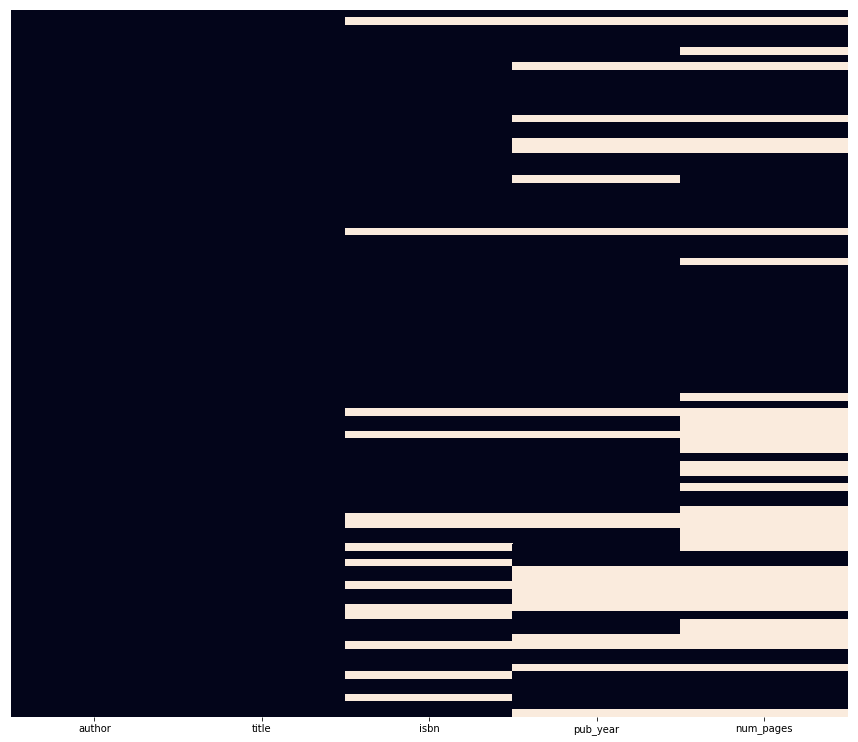

In [101]:
# let's see how this second batch looks like

plt.pyplot.figure(figsize=(15,13))
sns.heatmap(authors_dfz == '', cbar=False,yticklabels=False);

In [144]:
# let's fuse that with the previous batch

authors_df = pd.concat([authors_df,authors_dfz])
authors_df.shape

2606

In [103]:
# save the csv, so we don't lose the query

authors_df.to_csv('data/authors.csv')

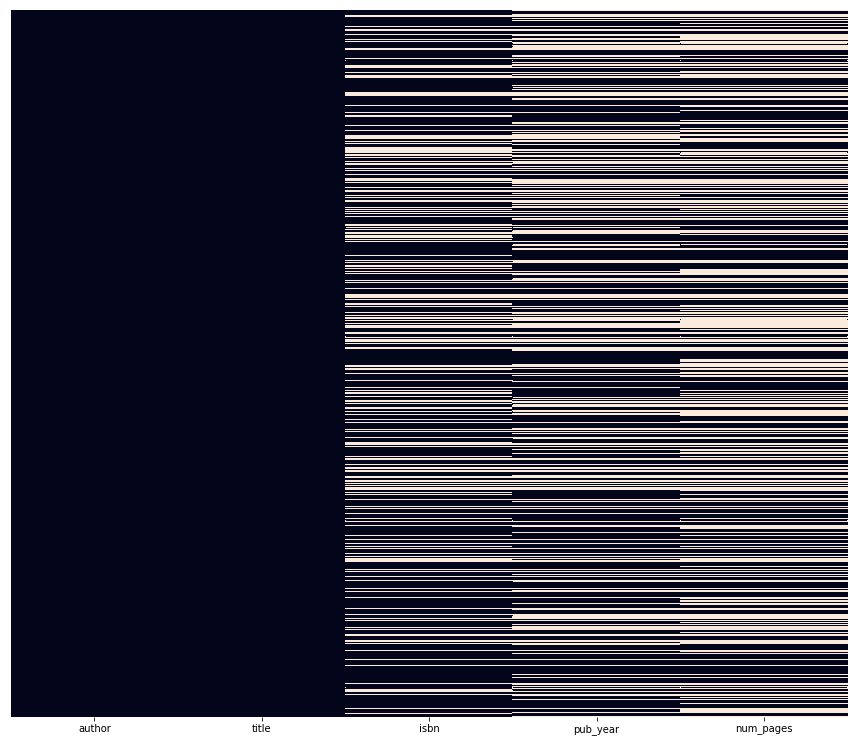

In [105]:
# let's take a look at the dataframe

plt.pyplot.figure(figsize=(15,13))
sns.heatmap(authors_df == "", cbar=False,yticklabels=False);

In [106]:
print("the total ammount of empty values for 'ISBN' is:  " + str(authors_df['isbn'].value_counts()[0]))
print("the total ammount of empty values for 'year of publication' is:  " + str(authors_df['pub_year'].value_counts()[0]))
print("the total ammount of empty values for 'number of pages' is:  " + str(authors_df['num_pages'].value_counts()[0]))

the total ammount of empty values for 'ISBN' is:  884
the total ammount of empty values for 'year of publication' is:  1155
the total ammount of empty values for 'number of pages' is:  1370


### Books API: working with json

In [119]:
# now, let's retrieve data from those books through the isbn, and merge by that parameter
# the website only accepts 1000 requests per call, so we can make packs with that number in mind

n_rows = authors_df.shape[0]
counter1 = 0
counter2 = 0
pack = ''
books_df = pd.DataFrame()

while n_rows > 0:
    while counter1 < 500 and n_rows > 0:
        if authors_df.iloc[counter1+(500*counter2)]['isbn'] != '':
            pack = str(authors_df.iloc[counter1+(500*counter2)]['isbn']) + ',' + pack        
        counter1 += 1
        n_rows -= 1
    url = 'https://www.goodreads.com/book/review_counts.json?isbns={}&key=ejIq4gALj4hDr5pQ4hegQ'.format(pack)
    response = requests.get(url)
    print(url)
    print(url.count(','))
    results = response.json()
    pack_df = pd.DataFrame(results)
    books_df = pd.concat([books_df,pack_df], ignore_index=True)
    pack = ''
    counter2 += 1
    counter1 = 0

books_df = books_df['books'].apply(pd.Series)

# disclaimer: I know now that there's an array slicer just for that kind of operation

https://www.goodreads.com/book/review_counts.json?isbns=0486447812,1420931113,0199297223,607110338X,1908096799,0199242208,8845913740,9754686785,1406596124,0486446530,1406596183,884591772X,1602063443,1602063583,8845914801,0061768243,0141191597,1602063508,884591576X,0084716626,0486440117,8477203903,8525414646,1573920339,3423306718,964448407X,1419161296,0141018941,0486435504,0486217620,1903933617,0140442278,0486217612,4326600772,1882345290,1882345673,0812213912,0812212800,1138784583,1136434011,1281028185,0080441726,0080440002,0926582232,0748703268,0415437172,0275916537,1317665910,0415475171,0415412250,0748717838,0415412277,6612169249,0273726498,0950206601,661264544X,0415112184,1848605684,0415411661,0415437148,0080942725,0415102820,0080446442,0750641282,0415125006,0080435890,0415437164,0415135117,0415583349,0130272868,0702025739,0415437156,0415160049,0415439019,1136410600,0131249452,1408009161,058235658X,1317481593,008096933X,1544321503,1439060320,1118016262,1681173913,032483487X,061874933

https://www.goodreads.com/book/review_counts.json?isbns=1119514762,0764535838,0764501321,0470176547,0471773182,0470044004,8126541725,0470527552,8126542985,0470475374,0764547992,0764532596,0764517643,0764598163,0470591854,076454800X,0470046910,1118488091,0470137665,0764546090,0764532634,111864218X,0764540734,1118490444,0764540726,0470044020,0764539671,0470475366,0470044012,1118330684,0470044039,1118490398,0470046740,0470620129,1118490363,0470475358,0470474874,6613766917,1118132874,1118132858,111952038X,8126545658,8126555394,1280995300,1119062462,1118132866,111813284X,2412046484,8491870539,1461443482,6064401729,087422134X,0199738572,161614419X,159102580X,1101982853,039916524X,044488646X,0821836374,9606640094,0948797231,8883231309,0736505202,0387985395,069105911X,0387989935,0201554402,0883851695,0387966080,0387201580,0387158510,0716704730,071671504X,0307377350,0716711869,0465043550,2706812338,0521255783,3642641857,8804664037,1630266337,9612334447,8498926408,0241415322,8174868402,607747735

https://www.goodreads.com/book/review_counts.json?isbns=0961392126,0961392118,0961392142,1589484835,1589482425,1589482166,1589484835,1879102056,0006875947,1589482425,1589482107,158948083X,1589482603,1564781186,1928746268,1977815715,0905974468,1780731027,1780730764,1780730594,154655615X,9810967632,1589484835,1928746225,0941543447,1977990118,1564781240,0961194421,9810984863,156478133X,0916583457,156478116X,0916583422,168396022X,1564781771,0916583600,0965288102,0817354069,1615577823,1557134375,0815623062,0803230729,1564781372,144118869X,080577534X,1564788040,1564786099,1441177043,1574231502,1564782115,1589480082,0266657788,3744639150,1589484878,1879102528,1589484835,187910248X,1589485300,1589484622,187910251X,1589480333,1589484495,1589482425,0976629666,1589484835,0854902775,194717214X,0582034612,000197100X,1947172131,1947172204,0003187756,0954830547,8862081146,3906915123,1973746603,0003187683,1379180112,0954859251,0954859278,0952164523,0954714687,1901151018,0003181014,1493839160,144263880

In [122]:
# how that head looks now

books_df = books_df['books'].apply(pd.Series)
books_df

,id,isbn,isbn13,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,987602,0486447812,9780486447810,91,223,8,93,235,8,3.77
1,6459148,1420931113,9781420931112,95,363,11,96,364,12,4.08
2,6951674,0199297223,9780199297221,65,280,3,105,428,6,4.10
3,8501578,607110338X,9786071103383,100,227,6,113,255,7,3.95
4,17087717,1908096799,9781908096791,59,261,10,133,438,12,3.44
5,230816,0199242208,9780199242207,86,251,3,120,380,7,4.37
6,9719164,8845913740,9788845913747,80,225,6,182,431,13,3.38
7,29341670,9754686785,9789754686784,112,328,8,216,510,10,4.00
8,3190176,1406596124,9781406596120,94,242,7,222,526,11,4.18
9,117582,0486446530,9780486446530,181,876,10,255,1111,15,3.95


In [123]:
# let's merge both datasets by the isbns

authors_df = pd.merge(authors_df,books_df, on='isbn')
authors_df.head()

,author,title,isbn,pub_year,num_pages,id,isbn13,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,Ronald J. Baker,Implementing Value Pricing: A Radical Business...,047092957X,2010,400,10093617,9780470929575,49,205,4,105,332,5,4.30
1,Ronald J. Baker,Pricing on Purpose,0471729809,2006,374,1213568,9780471729808,35,179,4,40,191,4,4.12
2,Ronald J. Baker,The Firm of the Future: A Guide for Accountant...,0471264245,2003,360,7689,9780471264248,30,133,4,33,141,4,4.58
3,Ronald J. Baker,Professional's Guide To Value Pricing,0735543178,,,5147913,9780735543171,10,33,1,16,48,2,4.44
4,Ronald J. Baker,Measure What Matters to Customers: Using Key P...,0471752940,2006,186,1576344,9780471752943,8,79,0,9,82,0,4.33


In [ ]:
# dropping unnecessary columns
# after some research, I found out that 'work' columns are the ones with the actual data, instead of their sisters

authors_df.drop(columns=['isbn13','ratings_count','reviews_count','text_reviews_count','work_text_reviews_count'],inplace=True)
authors_df.head()

In [154]:
# we also need to change the data types to an appropriate class

print(authors_df.dtypes)
authors_df['num_pages'].replace(np.nan,0,inplace=True)
print(authors_df.head())
authors_df['num_pages'] = authors_df['num_pages'].astype('int64')
print(authors_df.head())
authors_df['pub_year'].replace(np.nan,0,inplace=True)
print(authors_df.head())
authors_df['pub_year'] = authors_df['pub_year'].astype('int64')
print(authors_df.head())
authors_df['average_rating'] = authors_df['average_rating'].astype('float64')

author                 object
title                  object
isbn                   object
pub_year              float64
num_pages             float64
id                      int64
work_ratings_count      int64
work_reviews_count      int64
average_rating        float64
dtype: object
            author                                              title  \
0  Ronald J. Baker  Implementing Value Pricing: A Radical Business...   
1  Ronald J. Baker                                 Pricing on Purpose   
2  Ronald J. Baker  The Firm of the Future: A Guide for Accountant...   
3  Ronald J. Baker              Professional's Guide To Value Pricing   
4  Ronald J. Baker  Measure What Matters to Customers: Using Key P...   

         isbn  pub_year  num_pages        id  work_ratings_count  \
0  047092957X    2010.0      400.0  10093617                 105   
1  0471729809    2006.0      374.0   1213568                  40   
2  0471264245    2003.0      360.0      7689                  33   
3  07

In [155]:
authors_df.dtypes

author                 object
title                  object
isbn                   object
pub_year                int64
num_pages               int64
id                      int64
work_ratings_count      int64
work_reviews_count      int64
average_rating        float64
dtype: object

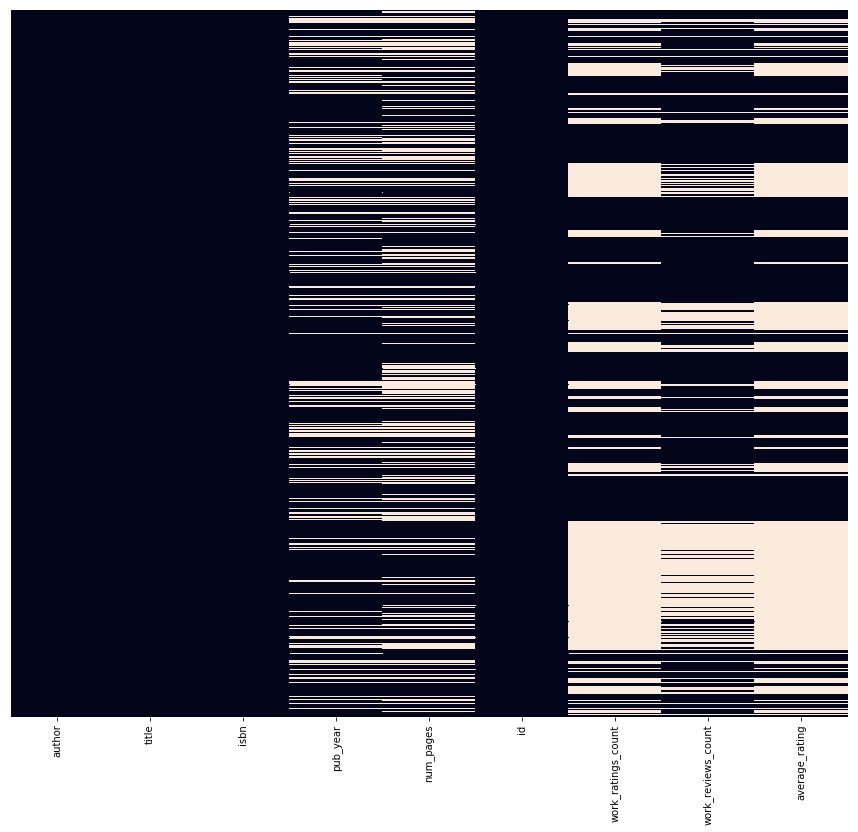

In [157]:
# let's take another look at the dataframe, this time focusing on the 0s

plt.pyplot.figure(figsize=(15,13))
sns.heatmap(authors_df == 0, cbar=False,yticklabels=False);

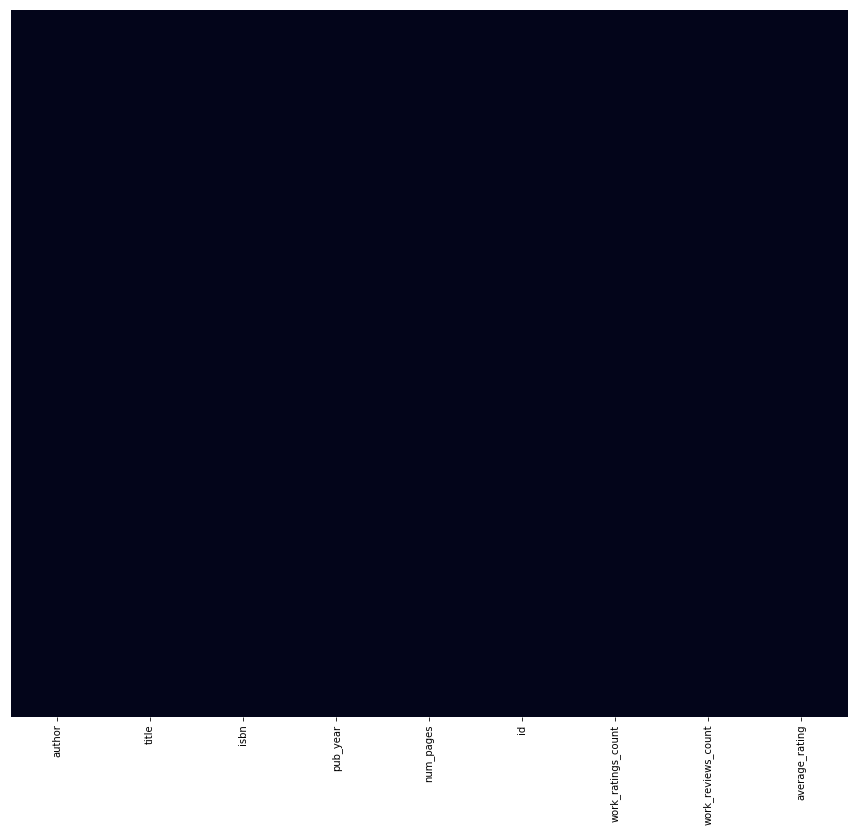

In [158]:
# now another that looks quite the same, but this time focusing on the ""s

plt.pyplot.figure(figsize=(15,13))
sns.heatmap(authors_df == "", cbar=False,yticklabels=False);

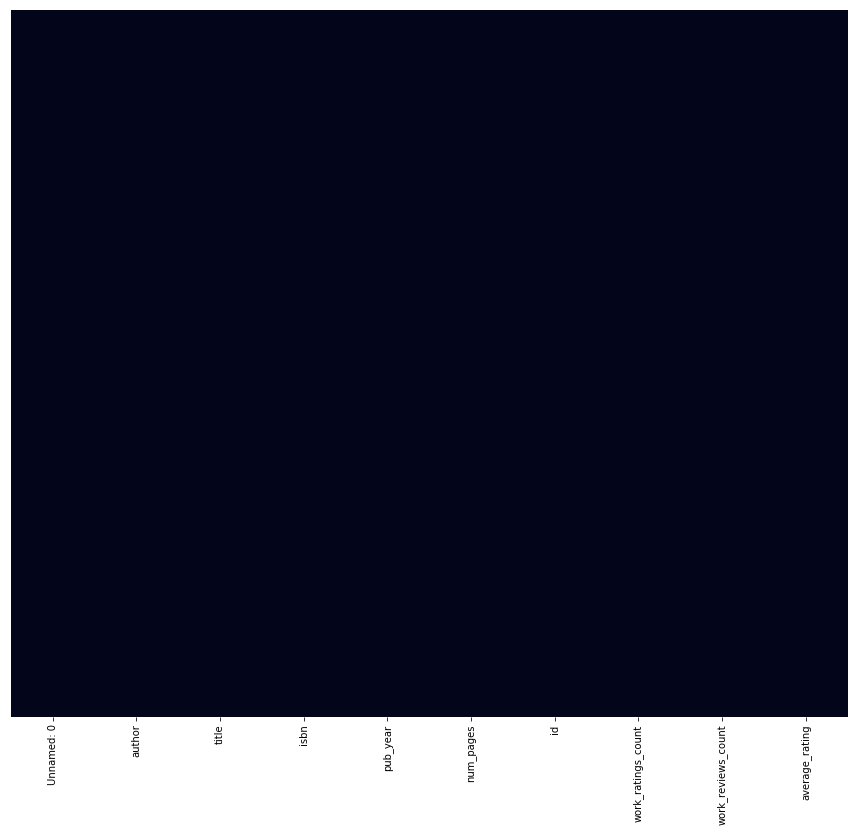

In [9]:
# now another that looks quite the same, but this time focusing on the ""s

plt.pyplot.figure(figsize=(15,13))
sns.heatmap(authors_df.isnull(), cbar=False,yticklabels=False);

In [44]:
# that means all empty data is represented by 0s.
# let's drop the id column
# let's also drop all rows empty from 'pub_year'-on

authors_df.replace(0,np.nan,inplace=True)
authors_df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
authors_df[['pub_year','num_pages','work_ratings_count','work_reviews_count','average_rating']].dropna(how='all',inplace=True)

/home/nacholez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [50]:
# now that everything is nice and clean, let's see how many authors and books we got

print(authors_df['author'].unique())
print(authors_df['author'].nunique())
print(authors_df['title'].unique())
print(authors_df['isbn'].nunique())

['Ronald J. Baker' 'Timothy Jury' 'Joshua D. Angrist'
 'Jörn-Steffen Pischke' 'Esther Duflo' 'Abhijit V. Banerjee'
 'Colin Cameron' 'Pravin K. Trivedi' 'Badi H. Baltagi' 'Alexander Elder'
 'Benjamin Graham' 'James Montier' 'James M. Cypher' 'James L. Dietz'
 'Roger Garrison' 'Brian Snowdon' 'Howard R. Vane' 'Ludwig von Mises'
 'Thomas Sowell' 'Jack B. Corgel' 'Rohit Verma' 'Michael C. Sturman'
 'Stephen J. Page' 'Valene L. Smith' 'Arthur Schopenhauer'
 'Thomas Gilovich' 'Daniel Kahneman' 'Dale Griffin' 'Laurence BonJour'
 'Douglas R. Hofstadter' 'Karl Popper' 'Richard P. Feynman'
 'Johannes Voit' 'Michael Miller' 'Paul E. Meehl' 'Alex Reinhart'
 'George Casella' 'Roger L. Berger' 'Richard von Mises' 'Jack D. Schwager'
 'Nate Silver' 'Destin Whitehurst' 'Erin Robinson' 'Aswath Damodaran'
 'Howard  Marks' 'Hans Reichenbach' 'Stephen Hawking'
 'Benoît B. Mandelbrot' 'Barbara Oakley' 'Danielle Stein Fairhurst'
 'John Walkenbach' 'David W. Allen' 'Jan Van Sickle' 'David Smith'
 'Nathan Stro

In [ ]:
# let's export that authors_df as csv

authors_df.to_csv('data/authors_scrap_api.csv')

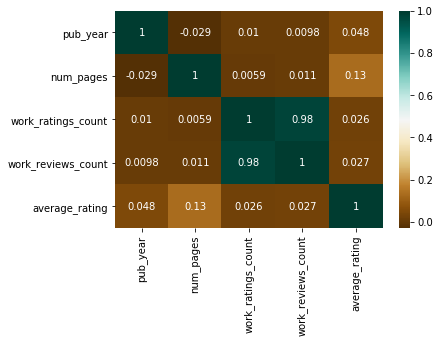

In [56]:
# curious to see how those stats relate in a matrix

sns.heatmap(authors_df.corr(),cmap='BrBG',annot=True);

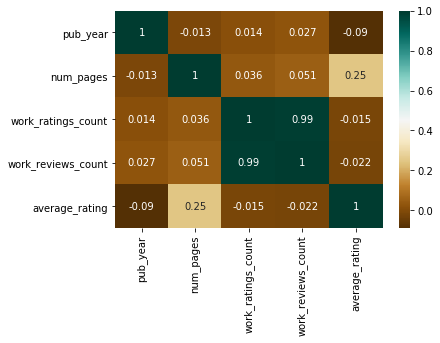

In [57]:
# nothing, except number of ratings and reviews, seem to relate. what if we coalesce the means by author?

authors_grouped = authors_df.groupby(authors_df['author']).mean()
sns.heatmap(authors_grouped.corr(),cmap='BrBG',annot=True);

In [71]:
# no relevant relationship was observed. let's see the top 20 most reviewed books

authors_df.sort_values('work_reviews_count',ascending=False).head(10)

,author,title,isbn,pub_year,num_pages,work_ratings_count,work_reviews_count,average_rating
701,Daniel Kahneman,"Thinking, Fast and Slow",0374275637,2011.0,499.0,243625.0,818766.0,4.14
1481,Stephen Hawking,A Brief History of Time,0553380168,1998.0,212.0,259477.0,599971.0,4.17
837,Richard P. Feynman,"""Surely You're Joking, Mr. Feynman!"": Adventur...",0393355624,2018.0,400.0,137883.0,290040.0,4.28
100,Benjamin Graham,The Intelligent Investor,0060555661,2006.0,623.0,60484.0,212834.0,4.23
1482,Stephen Hawking,The Grand Design,0553805371,2010.0,199.0,58094.0,149378.0,4.04
728,Douglas R. Hofstadter,"Gödel, Escher, Bach: An Eternal Golden Braid",0465026567,1999.0,777.0,39450.0,136044.0,4.29
1397,Nate Silver,The Signal and the Noise: Why So Many Predicti...,159420411X,2012.0,534.0,39093.0,98888.0,3.98
727,Douglas R. Hofstadter,Eugene Onegin: A Novel in Verse,0465020933,1999.0,203.0,48808.0,89247.0,4.09
1485,Stephen Hawking,Brief Answers to the Big Questions,1984819194,NaN,NaN,20545.0,84301.0,4.30
1483,Stephen Hawking,The Universe in a Nutshell,055380202X,2001.0,216.0,31906.0,73617.0,4.15


In [66]:
# which are the books with higher rates

authors_df.sort_values('average_rating',ascending=False).head(10)

,author,title,isbn,pub_year,num_pages,work_ratings_count,work_reviews_count,average_rating
360,Thomas Sowell,Economia Básica: Um Guia de Economia Voltado a...,8550802387,2018.0,368.0,1.0,16.0,5.0
1813,David Smith,Blood 'n' Thunder Presents: Pulpourri (Volume 4),1718759681,NaN,NaN,1.0,2.0,5.0
160,Howard R. Vane,An Encyclopedia Of Macroeconomics,1840643870,NaN,NaN,3.0,8.0,5.0
161,Howard R. Vane,An Encyclopedia Of Macroeconomics,1840643870,NaN,NaN,3.0,8.0,5.0
162,Howard R. Vane,An Encyclopedia Of Macroeconomics,1840643870,NaN,NaN,3.0,8.0,5.0
163,Howard R. Vane,An Encyclopedia Of Macroeconomics,1840643870,NaN,NaN,3.0,8.0,5.0
164,Brian Snowdon,"Conversations on Growth, Stability and Trade: ...",1843767236,NaN,NaN,3.0,5.0,5.0
538,Arthur Schopenhauer,"Arthur Schopenhauer, Second Collection",1499626819,2014.0,422.0,1.0,2.0,5.0
537,Arthur Schopenhauer,"O osudu, duchařství a hluku",8086559114,2002.0,85.0,1.0,2.0,5.0
536,Arthur Schopenhauer,Metafysika lásky a hudby,8085885387,1995.0,159.0,1.0,1.0,5.0


In [75]:
# that didn't seem useful, because the number of ratings for those is pretty low. let's test another way

authors_df[authors_df['work_ratings_count'] >= 10000].sort_values('average_rating',ascending=False).head(10)

,author,title,isbn,pub_year,num_pages,work_ratings_count,work_reviews_count,average_rating
1485,Stephen Hawking,Brief Answers to the Big Questions,1984819194,NaN,NaN,20545.0,84301.0,4.30
728,Douglas R. Hofstadter,"Gödel, Escher, Bach: An Eternal Golden Braid",0465026567,1999.0,777.0,39450.0,136044.0,4.29
837,Richard P. Feynman,"""Surely You're Joking, Mr. Feynman!"": Adventur...",0393355624,2018.0,400.0,137883.0,290040.0,4.28
838,Richard P. Feynman,"""What Do You Care What Other People Think?"": F...",0393355640,2018.0,288.0,20443.0,49992.0,4.27
1598,Barbara Oakley,A Mind for Numbers: How to Excel at Math and S...,039916524X,2014.0,322.0,10296.0,44071.0,4.26
21,Abhijit V. Banerjee,Poor Economics: A Radical Rethinking of the Wa...,1586487981,2011.0,320.0,10844.0,36830.0,4.25
20,Esther Duflo,Poor Economics: A Radical Rethinking of the Wa...,1586487981,2011.0,320.0,10844.0,36830.0,4.25
841,Richard P. Feynman,QED: The Strange Theory of Light and Matter,0691024170,1988.0,158.0,14748.0,37808.0,4.24
100,Benjamin Graham,The Intelligent Investor,0060555661,2006.0,623.0,60484.0,212834.0,4.23
1484,Stephen Hawking,A Briefer History of Time,0553804367,2005.0,176.0,28323.0,63505.0,4.22


In [83]:
# which are the authors with more published books

authors_df.groupby(authors_df['author']).count().sort_values('isbn',ascending=False).head(10)

,title,isbn,pub_year,num_pages,work_ratings_count,work_reviews_count,average_rating
author,,,,,,,
David Smith,623,623,524,488,148,226,148
Arthur Schopenhauer,263,263,200,185,137,198,137
Michael Miller,242,242,211,189,137,169,137
Jack D. Schwager,136,136,116,64,108,132,108
Richard P. Feynman,101,101,82,58,91,100,91
Stephen Hawking,98,98,65,57,88,97,88
John Walkenbach,87,87,55,49,53,70,53
Howard R. Vane,84,84,64,64,36,64,36
Karl Popper,83,83,67,65,58,79,58


In [86]:
# wich are the authors with higuer rates with an average of at least 1000 ratings per work

authors_grouped[authors_grouped['work_ratings_count']>=1000].sort_values('average_rating',ascending=False).head(10)

,pub_year,num_pages,work_ratings_count,work_reviews_count,average_rating
author,,,,,
Richard P. Feynman,2002.292683,354.879310,2743.241758,5962.840000,4.303846
Gayle Laakmann McDowell,2012.250000,626.000000,1410.400000,3724.333333,4.260000
Stephen Hawking,2003.215385,394.964912,5403.647727,12291.948454,4.198409
Nate Silver,2012.500000,379.500000,8649.200000,21552.400000,4.056000
Benjamin Graham,2006.428571,287.428571,3023.173913,8213.933333,4.017391
Douglas R. Hofstadter,2001.826087,407.500000,4395.629630,12208.074074,3.984444
Howard Marks,2013.000000,308.666667,1990.000000,5944.250000,3.970000
Barbara Oakley,2011.000000,368.666667,1484.750000,5258.000000,3.941250
Edward R. Tufte,1996.600000,158.888889,1825.909091,4855.000000,3.938182


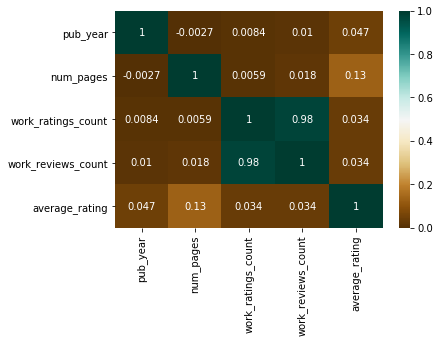

In [89]:
# there might be an interesting correlation if we drop all NaNs in ratings in number of pages

corr_books = authors_df.dropna(subset=['num_pages','average_rating'])
sns.heatmap(corr_books.corr(),cmap='BrBG',annot=True);

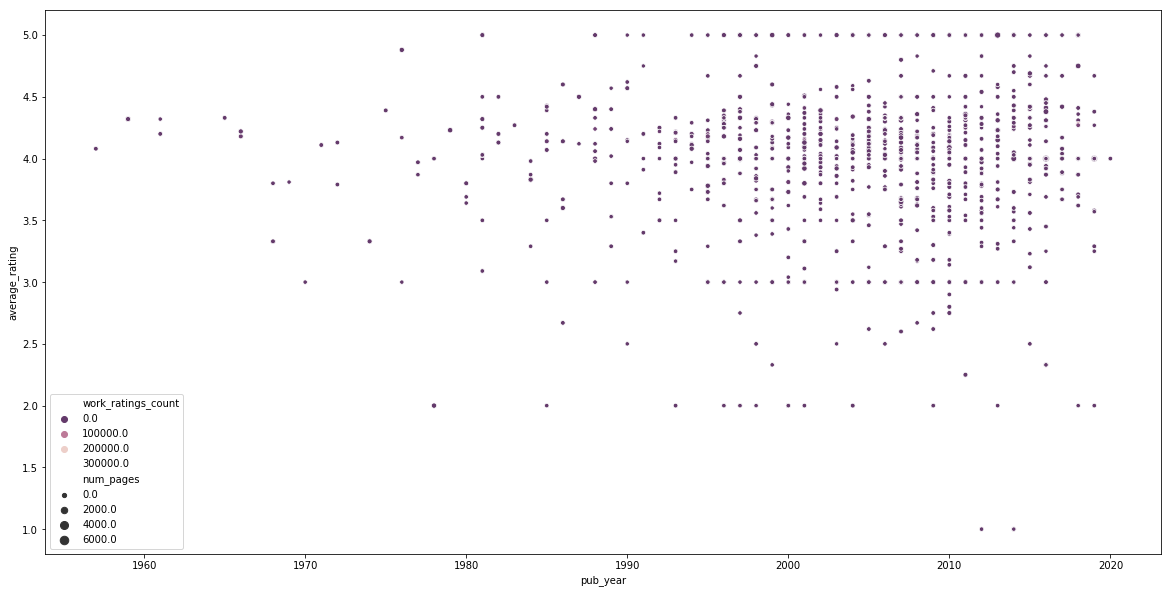

In [141]:
# there is actually less correlation now. let's see how are those books doing in a timeline.
#  number of pages is size, ratings_count is hue, y is average rating

plt.pyplot.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(dark=1, light=0.3, as_cmap=True)
sns.scatterplot(x='pub_year',y='average_rating',hue='work_ratings_count',size='num_pages',palette=cmap,data=authors_df);

### (BONUS) Skoob webscrapping: golden needles in the hay

In [1]:
https://www.skoob.com.br/livro/lista/{ISBN}
# actual page source of html data:
<a href='/ 
# average rating of the book
<span class="rating">
# number of evaluations
<div id='pg-livro-box-rating-avaliadores-numero'>
# quantidade de pessoas que leram
<a href="/livro/leitores/leram/24505/edicao:26637" class="text_blue">
# trocas disponiveis
<a href="/livro/leitores/trocam/24505/edicao:26637" class="link_11_off  l_icones sk-cor-branco">

SyntaxError: invalid syntax (<ipython-input-1-cd21f83244d3>, line 1)

In [ ]:


b = <a id='819723891323' href='/folder/me/docs'>link to folder</a>
b.get('id') -> '819723891323'
b['id'] -> '819723891323'
soup.find_all('title', attrs={'color': 'blue'})

In [145]:


# zz.find_all('a', attrs={'id': 'linkFiltro'})
authors_df.shape

(2606, 8)

In [146]:
authors_df.size

20848